In [1]:
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
import numpy as np

2024-02-18 21:24:10.912674: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 21:24:11.035527: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 21:24:11.035585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 21:24:11.053496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 21:24:11.090985: I tensorflow/core/platform/cpu_feature_guar

In [2]:

with open('vocab.txt',"r") as f:
    unique_words=f.readlines()
    
vocab=[]

for word in unique_words:
    vocab.append(word.strip())

vocab_size=len(vocab)+1
print(vocab_size)
embed_size = 100
window_size=2


cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

cbow.load_weights('model_weights.h5')

print(cbow.summary())

weights = cbow.get_weights()[0]

7794
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            779400    
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 7794)              787194    
                                                                 
Total params: 1566594 (5.98 MB)
Trainable params: 1566594 (5.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


2024-02-18 21:24:12.765771: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 21:24:12.791306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 21:24:12.791484: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
def euclidean(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

In [4]:
filename = 'SimLex-999/SimLex-999.txt'


print(vocab)

with open(filename,"r") as f:
    content = f.readlines()
content = content[1:]
found=0
notfound=0
for line in content:
    word1 = line.split()[0]
    word2 = line.split()[1]
    
    if word1 in vocab and word2 in vocab:
        found+=1
        # print("Word found !",end=" ")
        print(word1,word2,euclidean(weights[vocab.index(word1)],weights[vocab.index(word2)]))
    else:
        notfound+=1
print(found,notfound)
    

['the', 'of', 'and', 'in', 'to', 'a', 'one', 'is', 'that', 'nine', 'as', 'zero', 's', 'by', 'two', 'or', 'for', 'eight', 'his', 'lincoln', 'was', 'on', 'with', 'six', 'he', 'three', 'an', 'it', 'from', 'five', 'be', 'not', 'four', 'are', 'at', 'seven', 'this', 'autism', 'which', 'have', 'aristotle', 'also', 'who', 'some', 'rand', 'they', 'other', 'war', 'her', 'anarchism', 'achilles', 'many', 'had', 'all', 'but', 'such', 'more', 'were', 'people', 'their', 'autistic', 'most', 'states', 'would', 'has', 'can', 'first', 'anarchists', 'she', 'may', 'philosophy', 'anarchist', 'see', 'time', 'state', 'him', 'abraham', 'these', 'about', 'when', 'i', 'best', 'there', 'been', 'often', 'its', 'united', 'after', 'what', 'social', 'others', 'if', 'union', 'altruism', 'than', 'only', 'however', 'into', 'new', 'while', 'own', 'american', 'alabama', 'during', 'general', 'do', 'life', 'slavery', 'will', 'no', 'them', 'academy', 'used', 'so', 'because', 'early', 'although', 'movement', 'both', 'those', 

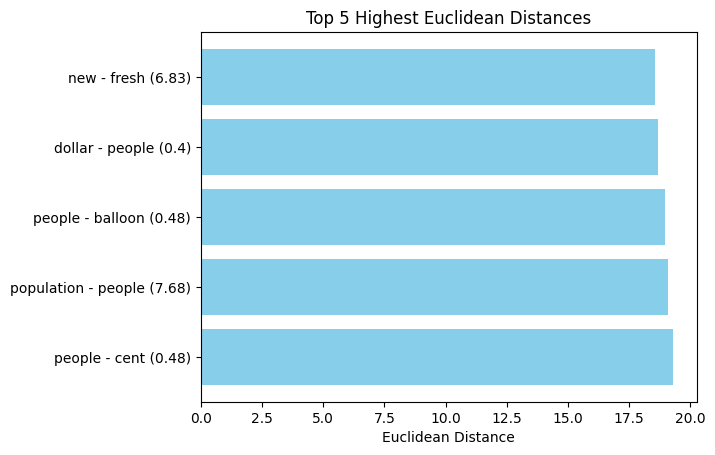

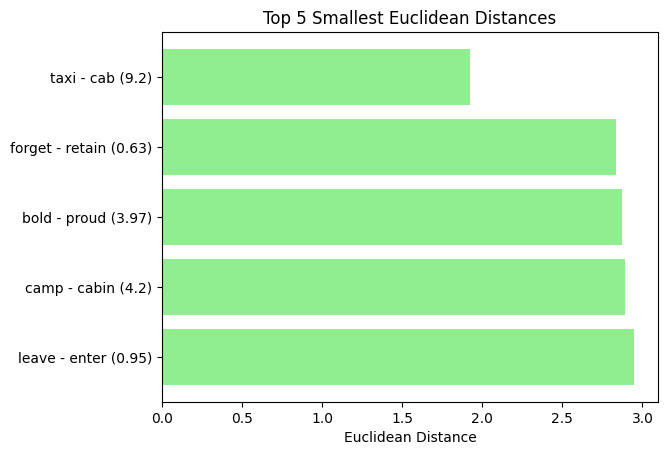

In [5]:
import matplotlib.pyplot as plt

# Assuming you have already defined `content`, `vocab`, `weights`, and `euclidean` function

distances = []

for line in content:
    words = line.split()
    word1, word2 = words[:2]
    similarity_score = float(words[3])  # Assuming the similarity score is a float value
    
    if word1 in vocab and word2 in vocab:
        distance = euclidean(weights[vocab.index(word1)], weights[vocab.index(word2)])
        distances.append((word1, word2, distance, similarity_score))

# Sort distances by the third element (euclidean distance)
sorted_distances = sorted(distances, key=lambda x: x[2])

# Plot top 5 highest euclidean distances
top_5_highest = sorted_distances[-5:]
top_5_highest_labels = [f'{pair[0]} - {pair[1]} ({pair[3]})' for pair in top_5_highest]
top_5_highest_distances = [pair[2] for pair in top_5_highest]

plt.barh(top_5_highest_labels, top_5_highest_distances, color='skyblue')
plt.xlabel('Euclidean Distance')
plt.title('Top 5 Highest Euclidean Distances')
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 smallest euclidean distances
top_5_smallest = sorted_distances[:5]
top_5_smallest_labels = [f'{pair[0]} - {pair[1]} ({pair[3]})' for pair in top_5_smallest]
top_5_smallest_distances = [pair[2] for pair in top_5_smallest]

plt.barh(top_5_smallest_labels, top_5_smallest_distances, color='lightgreen')
plt.xlabel('Euclidean Distance')
plt.title('Top 5 Smallest Euclidean Distances')
plt.gca().invert_yaxis()
plt.show()
